In [17]:
import pandas as p
import numpy as n
import seaborn as s
import matplotlib.pyplot as m
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [28]:
data = p.read_csv("lung.csv")
#print(data.head())
#print(data.tail())
data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [29]:
data["LUNG_CANCER"] = (data["LUNG_CANCER"] == "YES").astype(int)

for label in data.columns[:-1]:
  data[label] = (data[label]==2).astype(int)

data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,0,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [32]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,0,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0


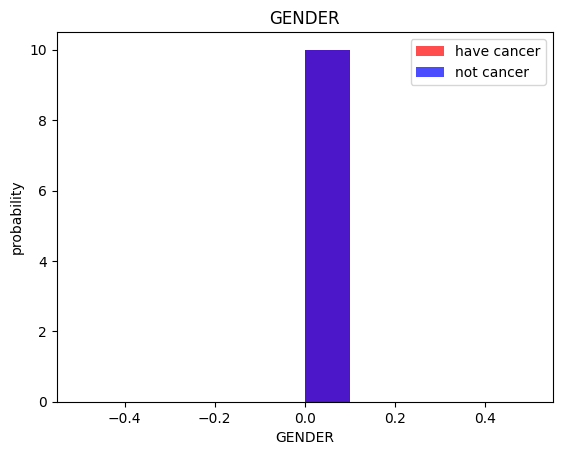

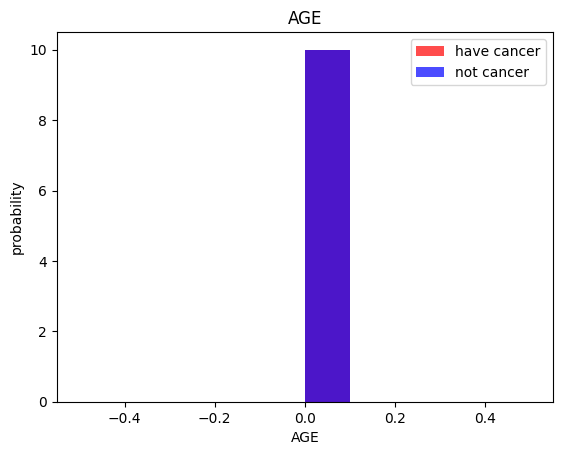

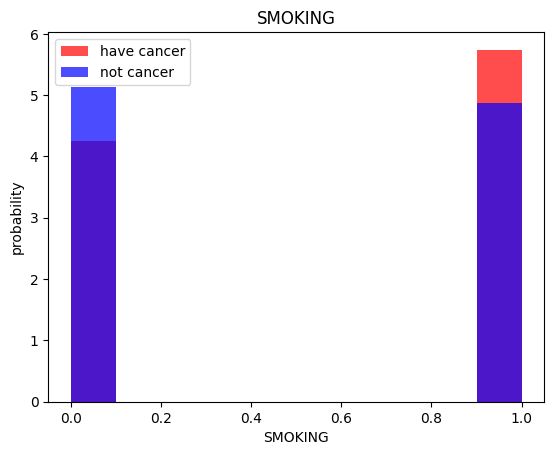

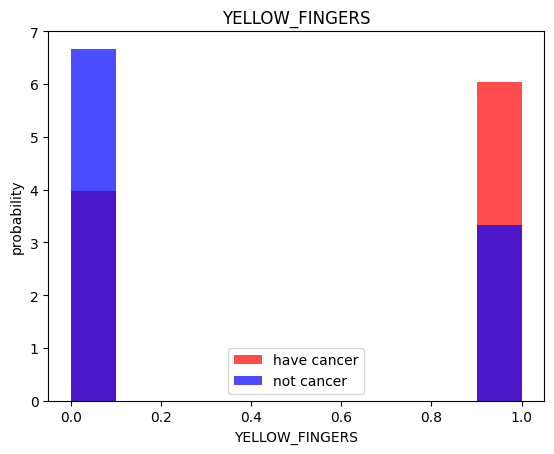

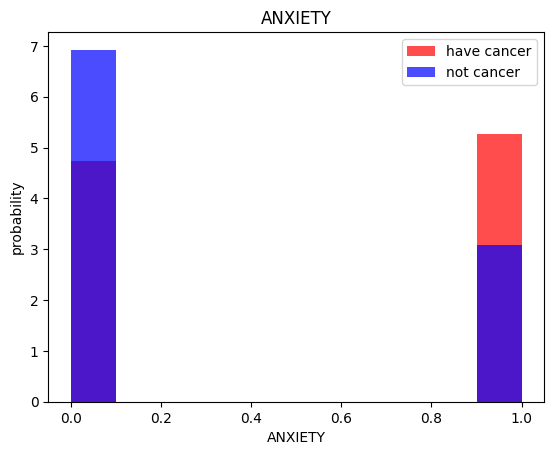

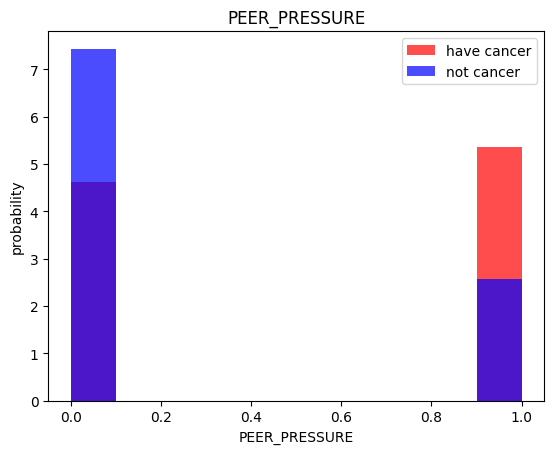

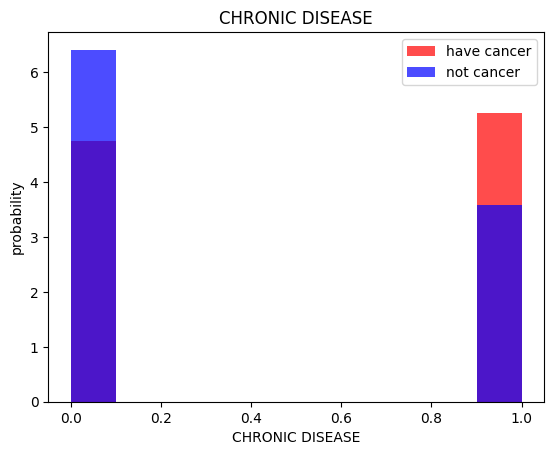

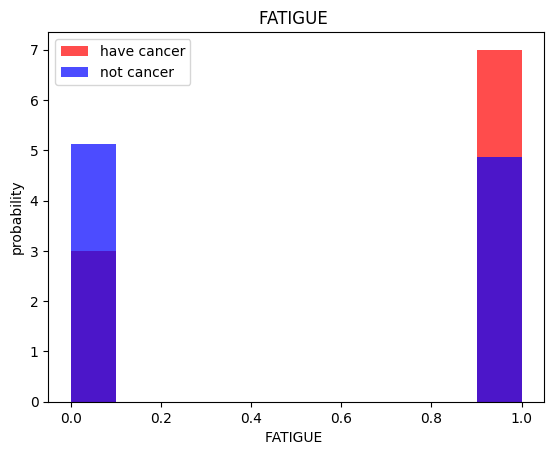

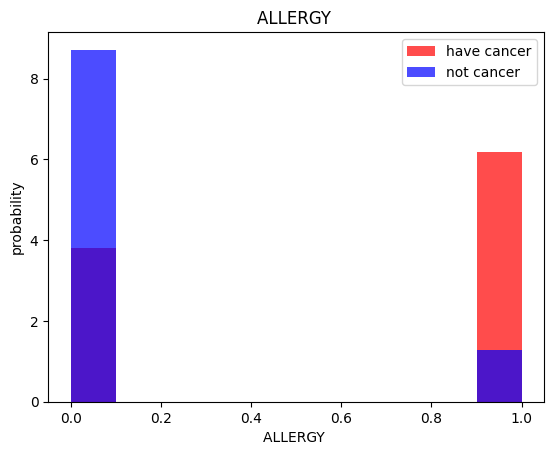

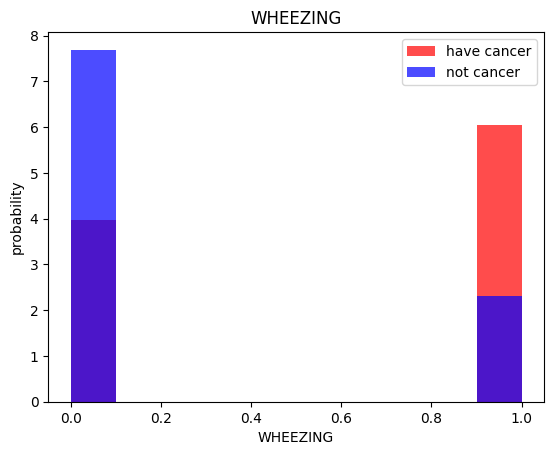

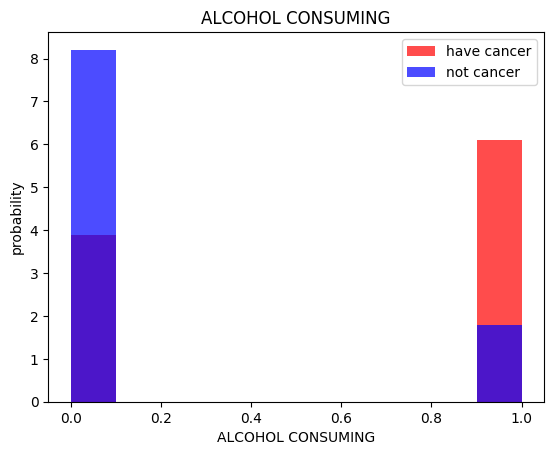

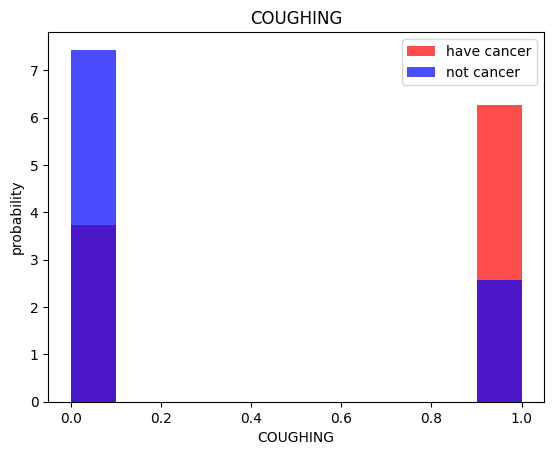

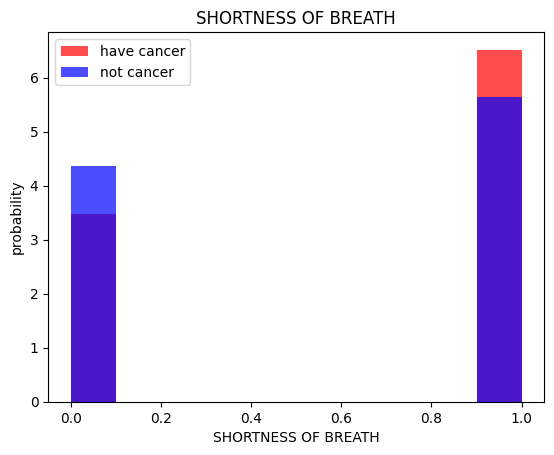

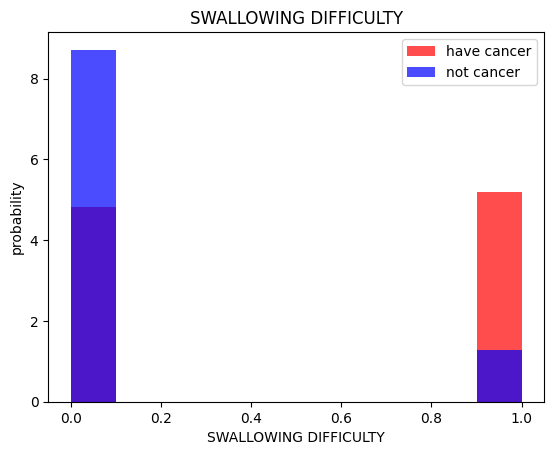

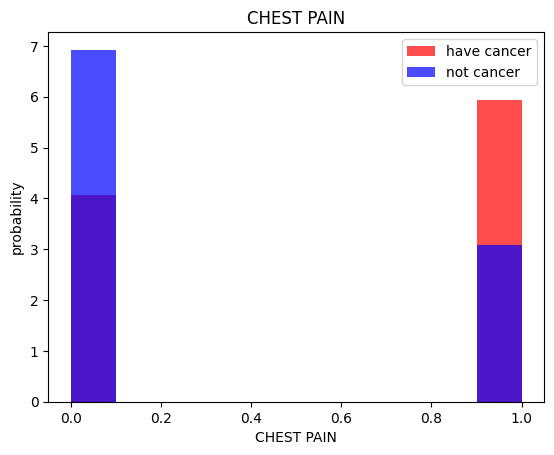

In [31]:
for label in data.columns[:-1]:
  m.hist(data[data["LUNG_CANCER"]==1][label], color='red', label='have cancer', alpha=0.7, density=True)
  m.hist(data[data["LUNG_CANCER"]==0][label], color='blue', label='not cancer', alpha=0.7, density=True)
  m.title(label)
  m.ylabel("probability")
  m.xlabel(label)
  m.legend()
  m.show()

In [33]:
train, valid, test = n.split(data.sample(frac=1), [int(0.6*len(data)), int(0.8*len(data))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [34]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = n.hstack((X, n.reshape(y, (-1, 1))))

  return data, X, y

In [35]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

#knn


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [38]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
y_pred = knn_model.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      1.00      0.48         5
           1       1.00      0.81      0.89        57

    accuracy                           0.82        62
   macro avg       0.66      0.90      0.68        62
weighted avg       0.94      0.82      0.86        62



#nb


In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [43]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.80      0.40         5
           1       0.98      0.81      0.88        57

    accuracy                           0.81        62
   macro avg       0.62      0.80      0.64        62
weighted avg       0.92      0.81      0.85        62



#lr


In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [46]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.84      0.91        57

    accuracy                           0.85        62
   macro avg       0.68      0.92      0.72        62
weighted avg       0.95      0.85      0.88        62



## svm

In [47]:
from sklearn.svm import SVC

In [48]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [49]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.88      0.93        57

    accuracy                           0.89        62
   macro avg       0.71      0.94      0.76        62
weighted avg       0.95      0.89      0.91        62

